# Analyse des donnees

In [105]:
"to load data from github (update it if we have to)"
import os
if not os.path.exists("assets"):
    print("Data wansn't here. Let's download it!")
    !git clone https://github.com/desmond-rn/assets.git
else:
    print("Data already here. Let's update it!")
    %cd assets
    # %rm -rf assets
    !git pull https://github.com/desmond-rn/assets.git
    %cd ..

print("\n")
!ls assets/dataframes/inverse

Data already here. Let's update it!
/content/assets
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/desmond-rn/assets
 * branch            HEAD       -> FETCH_HEAD
Updating dd1c5c3..930b8fa
Fast-forward
 dataframes/inverse/df_spatial.csv  | 90 ++++++++++++++++++++++++++++++++++++++
 dataframes/inverse/df_temporal.csv | 90 ++++++++++++++++++++++++++++++++++++++
 2 files changed, 180 insertions(+)
/content


df_spatial.csv	df_temporal.csv


In [0]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import ast            # Pour convertir les chaines de carateres en type Python
import warnings       # Pour eviter de souvent afficher des messages d'erreurs encombrants

**Obectif du projet**
- Analyse des donnees

## I - RETRAITEMENT DES DONNESS

## Chargeons les donnees

### En espace

In [107]:
types = {'x_min':float, 'x_max':float, 'N':int, 'c':float, 'a':float, 'C_v':float, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str, 'dt':float, 'time_steps':int, 'x':str, 'rho':str, 'sigma_a':str, 'sigma_c':str, 'E_init':str, 'E_final':str, 'F_init':str, 'F_final':str, 'T_init':str, 'T_final':str}
df_space = pd.read_csv("assets/dataframes/inverse/df_spatial.csv", thousands=',', dtype=types)

df_space.head(1)      ### rho_expr a des problemes

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,sigma_a_expr,sigma_c_expr,E_x_0_expr,F_x_0_expr,T_x_0_expr,dt,time_steps,x,rho,sigma_a,sigma_c,E_init,E_final,F_init,F_final,T_init,T_final
0,0.0,10.0,100,1.0,1.0,1.0,0.99,0.0001,4.0,0,0,0,exp(-((x-5)^2)/(2*(0.5^2))),0,0.25,0.099,41,"[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.21674e-22, 3.70353e-21, 2.52616e-20, 1.6555...","[0.10395, 0.14482, 0.193937, 0.249649, 0.30892...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.10395, -0.14482, -0.193937, -0.249649, -0....","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2..."


In [108]:
df_space.dtypes

x_min           float64
x_max           float64
N                 int64
c               float64
a               float64
C_v             float64
CFL             float64
epsilon         float64
t_final         float64
rho_expr         object
sigma_a_expr     object
sigma_c_expr     object
E_x_0_expr       object
F_x_0_expr       object
T_x_0_expr       object
dt              float64
time_steps        int64
x                object
rho              object
sigma_a          object
sigma_c          object
E_init           object
E_final          object
F_init           object
F_final          object
T_init           object
T_final          object
dtype: object

In [109]:
type(df_space.loc[0, 'rho_expr'])

str

### En temps

In [110]:
types = {'x_min':float, 'x_max':float, 'N':int, 'c':float, 'a':float, 'C_v':float, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str, 'dt':float, 'time_steps':int, 'E_0':str, 'E_N':str, 'F_0':str, 'F_N':str, 'T_0':str, 'E_final':str, 'T_N':str}
df_time = pd.read_csv("assets/dataframes/inverse/df_temporal.csv", thousands=',', dtype=types)

df_time.head(1)      ### rho_expr a des problemes

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,sigma_a_expr,sigma_c_expr,E_x_0_expr,F_x_0_expr,T_x_0_expr,dt,time_steps,E_0,E_N,F_0,F_N,T_0,T_N
0,0.0,10.0,100,1.0,1.0,1.0,0.99,0.0001,4.0,0,0,0,exp(-((x-5)^2)/(2*(0.5^2))),0,0.25,0.099,41,"[5.21674e-22, 2.09669e-21, 1.2677e-20, 8.09504...","[5.21674e-22, 2.09669e-21, 1.2677e-20, 8.09504...","[0, -1.57502e-21, -1.21553e-20, -8.04287e-20, ...","[0, 1.57502e-21, 1.21553e-20, 8.04287e-20, 5.0...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2..."


#II - VISUALISATION DES DONNES

## En espace

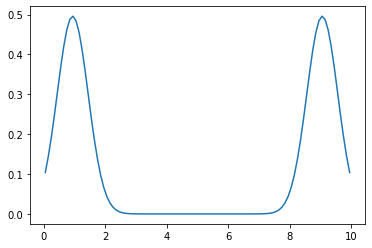

In [111]:
""" plot pour la premiere ligne"""
# x_expr = df_space.loc[2, 'rho_exp']
# x_expr

x = df_space.loc[2, 'x']
type(x)
x = np.array(ast.literal_eval(x))
# print(x)

y = df_space.loc[2, 'E_final']
type(x)
y = np.array(ast.literal_eval(y))
# print(y)

plt.plot(x, y)

# En temps

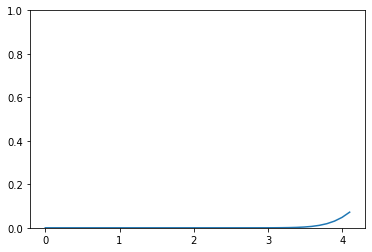

In [112]:
time_steps = df_time.loc[2, 'time_steps']
t_final = df_time.loc[2, 't_final']
dt = df_time.loc[2, 'dt']

t = np.linspace(0, t_final+dt, time_steps)

y = df_time.loc[2, 'E_N']
y = np.array(ast.literal_eval(y))

ax = plt.gca()
ax.set_ylim([0, 1])
ax.plot(t, y)